In [1]:
import numpy as np
import os

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape   # 28*28 = 784

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# 너무 오래 걸려서 돌리는 것은 생략

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(len(y), n_folds=5)

params = [{'weights' : ['uniform', 'distance'], 'n_neighbors' : [4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, params, cv = kf)
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

## 문제 2

In [31]:
from scipy.ndimage.interpolation import shift

In [34]:
def shift_image(image, down, right):
  image = image.reshape(28,28)
  shift_img = shift(image, [down, right], cval = 0)
  return shift_img.reshape(28,28)

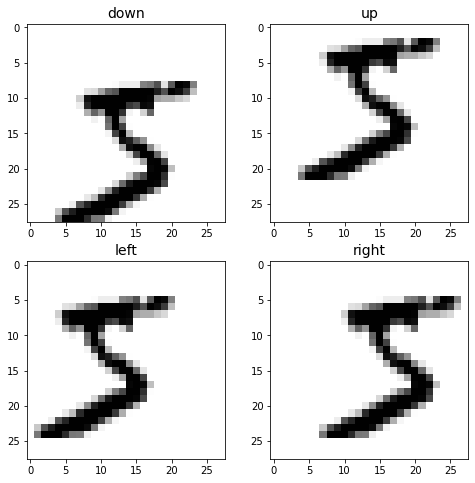

In [35]:
image = X[0]
up = shift_image(image, -3, 0)
down = shift_image(image, 3, 0)
left = shift_image(image, 0, -3)
right = shift_image(image, 0, 3)

plt.figure(figsize=(8,8))
plt.subplot(221); plt.title("down", fontsize=14); plt.imshow(down, cmap = 'binary')
plt.subplot(222); plt.title("up", fontsize=14); plt.imshow(up, cmap = 'binary')
plt.subplot(223); plt.title("left", fontsize=14); plt.imshow(left, cmap = 'binary')
plt.subplot(224); plt.title("right", fontsize=14); plt.imshow(right, cmap = 'binary')

plt.show()

In [36]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for down, right in ((1, 0), (-1, 0), (0, 1), (0, -1)):  # 이미지를 각각 4 방향으로 이동하고 저장
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, down, right))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [37]:
shuffle_idx = np.random.permutation(len(X_train_augmented))  # 무작위로 배열을 섞음
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(grid_search.best_params_)  

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)